# Mental Health Care Usage for Adolescents

Author: Harold Cha \
DIGHUM101 Practicing the Digital Humanities, taught by Professor Evan Muzzall

![therapy](../images/therapy.jpg)

## Introduction

In [3]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [4]:
pwd

'/Users/haroldcha/Desktop/DIGHUM101_Project/Notebooks'

In [5]:
cd "../Data/sample_child_survey/csv"

/Users/haroldcha/Desktop/DIGHUM101_Project/Data/sample_child_survey/csv


In [6]:
ls

samchild_2000.csv  samchild_2005.csv  samchild_2010.csv  samchild_2015.csv*
samchild_2001.csv  samchild_2006.csv  samchild_2011.csv  samchild_2016.csv*
samchild_2002.csv  samchild_2007.csv  samchild_2012.csv  samchild_2017.csv*
samchild_2003.csv  samchild_2008.csv  samchild_2013.csv  samchild_2018.csv*
samchild_2004.csv  samchild_2009.csv  samchild_2014.csv


In [197]:
data_name = "samchild_{}.csv" # general format for reading data files
years = range(2000,2019)

samchild = {} # dictionary with year number as key and respective dataframe from specified year as value

# These lists will be for a separate summary dataframe listing total responses per year, as well as 
# total responses per answer pertaining to "CHCSYR1" per year
sum_of_responses = []
sum_of_yes = []
sum_of_no = []

for i in years:
    samchild["{}".format(i)] = pd.read_csv(data_name.format(i))
    
    # adding values to list for summary dataframe
    sum_of_responses.append(samchild["{}".format(i)]["RECTYPE"].count())
    sum_of_yes.append(len(samchild["{}".format(i)][samchild["{}".format(i)]["CHCSYR1"]==1]))
    sum_of_no.append(len(samchild["{}".format(i)][samchild["{}".format(i)]["CHCSYR1"]==2]))
    
    
    # replacing "No" responses to zeroes
    samchild["{}".format(i)].replace({"CHCSYR1" : {2:0}}, inplace=True)
    samchild["{}".format(i)].replace({"CHCAFYR2" : {2:0}}, inplace=True)
    
    # dropping empty responses in CHCSYR1
    samchild["{}".format(i)].dropna(subset=["CHCSYR1"], inplace=True)
    
    # dropping "Refused", "Not ascertained", or "Don't Know" responses in CHCSYR1
    irrel = samchild["{}".format(i)][(samchild["{}".format(i)]['CHCSYR1'] != 0 )
                                     & (samchild["{}".format(i)]['CHCSYR1'] != 1 )].index
    samchild["{}".format(i)].drop(irrel, inplace=True)
        
    # replacing integers with string for SEX accordingly
    samchild["{}".format(i)].replace({"SEX" : {1:"male", 2:"female"}}, inplace=True) 

In [173]:
# Assigning each key-value pair from the 'samchild' dictionary to variables for conveniency

child_00 = samchild["2000"]
child_01 = samchild["2001"]
child_02 = samchild["2002"]
child_03 = samchild["2003"]
child_04 = samchild["2004"]
child_05 = samchild["2005"]
child_06 = samchild["2006"]
child_07 = samchild["2007"]
child_08 = samchild["2008"]
child_09 = samchild["2009"]
child_10 = samchild["2010"]
child_11 = samchild["2011"]
child_12 = samchild["2012"]
child_13 = samchild["2013"]
child_14 = samchild["2014"]
child_15 = samchild["2015"]
child_16 = samchild["2016"]
child_17 = samchild["2017"]
child_18 = samchild["2018"]

In [174]:
# Combining all dataframes to one

big_child = pd.concat([child_00, child_01, child_02, child_03, child_04, child_05, child_06, child_07,
                      child_08, child_09, child_10, child_11, child_12, child_13, child_14, child_15,
                      child_16, child_17, child_18], axis=0, ignore_index=True)

big_child

In [205]:
# This cell creates a summary of all the counts per year

data = {"total":sum_of_responses, "CHCSYR1_yes":sum_of_yes, "CHCSYR1_no":sum_of_no}

child_summary = pd.DataFrame(data, index=years).reset_index().rename(columns={"index": "SRVY_YR"})

child_summary

,SRVY_YR,total,CHCSYR1_yes,CHCSYR1_no
0,2000,13376,729,10941
1,2001,13579,706,11214
2,2002,12524,742,10186
3,2003,12249,613,10155
4,2004,12424,743,10150
5,2005,12523,684,10322
6,2006,9837,510,8059
7,2007,9417,534,7648
8,2008,8815,509,7279
9,2009,11156,674,9105


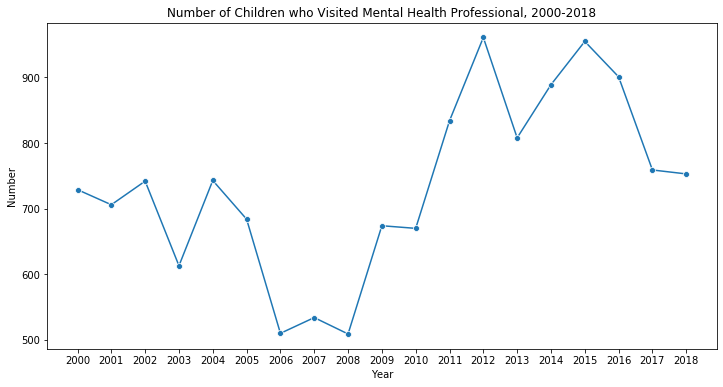

In [225]:
plt.figure(figsize=(12,6))
sns.lineplot(x="SRVY_YR", y="CHCSYR1_yes", marker = "o", data=child_summary)
plt.title("Number of Children who Visited Mental Health Professional, 2000-2018")
plt.xlabel("Year")
plt.xticks(mental_use_by_year["SRVY_YR"])
plt.ylabel("Number");

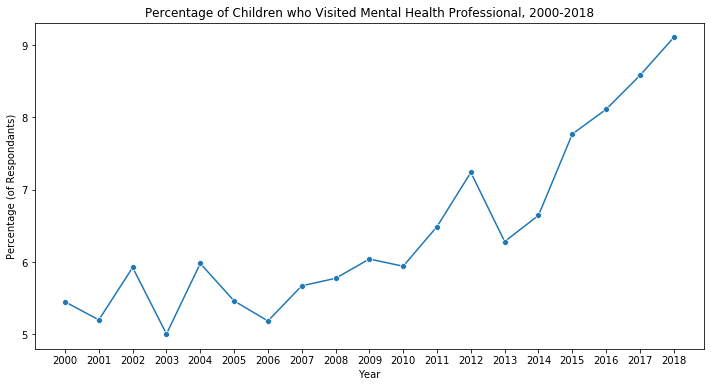

In [227]:
child_summary["percent_yes"] = (child_summary["CHCSYR1_yes"]/child_summary["total"])*100

plt.figure(figsize=(12,6))
sns.lineplot(x="SRVY_YR", y="percent_yes", marker = "o", data=child_summary)
plt.title("Percentage of Children who Visited Mental Health Professional, 2000-2018")
plt.xlabel("Year")
plt.xticks(mental_use_by_year["SRVY_YR"])
plt.ylabel("Percentage (of Respondants)");

In [109]:
big_child.loc[big_child["CHCSYR1"]==1][["SEX", "AGE_P", "CHCSYR1"]]

,SEX,AGE_P,CHCSYR1
35,female,7.0,1.0
43,female,6.0,1.0
62,female,16.0,1.0
90,male,10.0,1.0
91,female,11.0,1.0
...,...,...,...
193311,male,15.0,1.0
193353,female,17.0,1.0
193358,male,14.0,1.0
193373,female,16.0,1.0


In [238]:
big_child.loc[big_child["SEX"]==7]

,RECTYPE,SRVY_YR,HHX,FMX,PX,CSRESPNO,CSRELTIV,INTV_QRT,SEX,AGE_P,...,CYTQ_MDY,CYTQU_TA,CYTQ_BTT,CYTQ_MDT,CYTQU_QG,CYTQ_BTQ,CYTQ_MDQ,SCHDAYRP,CWZMSWKP,CAROUTP
77703,40,2006,5545,1,NaN,1,8.0,1.0,7,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78238,40,2006,8408,1,NaN,1,7.0,1.0,7,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78579,40,2006,10257,1,NaN,1,6.0,1.0,7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79098,40,2006,12942,1,NaN,1,5.0,1.0,7,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83825,40,2006,38221,1,NaN,1,7.0,4.0,7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84001,40,2006,39159,1,NaN,4,99.0,4.0,7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84076,40,2006,39546,1,NaN,1,8.0,4.0,7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84232,40,2006,40547,1,NaN,1,6.0,4.0,7,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84914,40,2006,44170,1,NaN,1,99.0,4.0,7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85449,40,2006,47292,1,NaN,1,7.0,4.0,7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
child_18[child_18["CHCSYR1"]==1]

,FPX,INTV_QRT,SEX,FMX,HISPAN_I,MRACRPI2,RACERPI2,MRACBPI2,AGE_P,RECTYPE,...,CAROUTP,CSRESPNO,LATEINTC,CSRELTVP,RSCL2_C2,RSCL2_E2,RSCL3_E3,RSCL5_P5,RSCL5_H5,RSCL6
9,2,1,female,1,12,1,1,1,17,40,...,0.0,1,2,1,2.0,2.0,2.0,2.0,2.0,2.0
10,5,1,male,1,12,1,1,1,5,40,...,NaN,1,1,1,1.0,0.0,0.0,0.0,1.0,0.0
21,5,1,male,1,6,1,1,16,9,40,...,NaN,1,2,1,2.0,2.0,2.0,2.0,2.0,0.0
26,3,1,male,1,12,1,1,1,12,40,...,NaN,1,2,1,0.0,0.0,0.0,2.0,0.0,3.0
30,5,1,male,1,12,1,1,1,17,40,...,NaN,2,2,1,1.0,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,3,4,male,1,12,1,1,1,15,40,...,NaN,1,2,1,1.0,1.0,0.0,1.0,1.0,1.0
8235,3,4,female,1,12,1,1,1,17,40,...,NaN,2,1,1,1.0,2.0,2.0,2.0,1.0,1.0
8240,2,4,male,1,12,1,1,1,14,40,...,1.0,1,2,1,2.0,1.0,2.0,0.0,2.0,1.0
8257,4,4,female,1,6,2,2,16,16,40,...,NaN,1,2,1,1.0,2.0,2.0,9.0,0.0,3.0
